In [ ]:
import pandas as pd
df=pd.read_csv('BVP_1.csv')


In [ ]:
df.head()

,ppg
0,-0.0
1,-0.0
2,-0.0
3,-0.0
4,-0.0


In [ ]:
df1=df[188800:208000]
df1.head()
df1.shape

(19200, 1)

In [ ]:
df1.tail()

,ppg
207995,-15.76
207996,-17.31
207997,-21.14
207998,-27.25
207999,-34.91


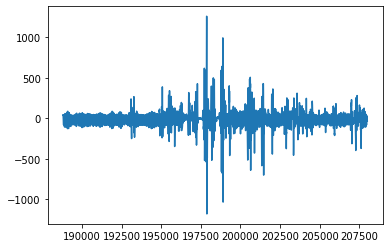

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.99)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(19008, 192)

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(18997, 10)
(18997,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(181, 10)
(181,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0] ,X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1 )

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM

In [ ]:
# create and fit the LSTM network, optimizer=adam, 25 neurons, dropout 0.1
model = Sequential()
model.add(LSTM(25, input_shape=(time_step,1)))
model.add(Dropout(0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 25)                2700      
                                                                 
 dropout_1 (Dropout)         (None, 25)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 2,726
Trainable params: 2,726
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=200, batch_size=240, verbose=1)

Epoch 1/200
80/80 [==============================] - 4s 10ms/step - loss: 0.0299
Epoch 2/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0026
Epoch 3/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 4/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0023
Epoch 5/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0021
Epoch 6/200
80/80 [==============================] - 1s 9ms/step - loss: 0.0020
Epoch 7/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0019
Epoch 8/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0017
Epoch 9/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 10/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 11/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 12/200
80/80 [==============================] - 1s 10ms/step - loss: 0.0014
Epoch 13/200
80/80 [======

In [ ]:
import tensorflow as tf

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

6/6 [==============================] - 0s 4ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
y_train=scaler.inverse_transform([y_train])
ytest=scaler.inverse_transform([ytest])

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train[0],train_predict[:,0]))

3.0761603302747154

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest[0],test_predict[:,0]))

1.1003229099132268

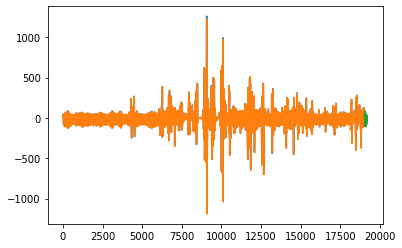

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=10
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

192

In [ ]:
x_input=test_data[182:].reshape(1,-1)
x_input.shape

(1, 10)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=10
i=0
while(i<64):
    
    if(len(temp_input)>10):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.46594408]
11
1 day input [0.47600231 0.47607207 0.47640853 0.47676551 0.47681065 0.47617465
 0.47460312 0.47209605 0.46895298 0.46594408]
1 day output [[0.46337157]]
2 day input [0.47607207 0.47640853 0.47676551 0.47681065 0.47617465 0.47460312
 0.47209605 0.46895298 0.46594408 0.46337157]
2 day output [[0.46163693]]
3 day input [0.47640853 0.47676551 0.47681065 0.47617465 0.47460312 0.47209605
 0.46895298 0.46594408 0.46337157 0.46163693]
3 day output [[0.4608349]]
4 day input [0.47676551 0.47681065 0.47617465 0.47460312 0.47209605 0.46895298
 0.46594408 0.46337157 0.46163693 0.46083489]
4 day output [[0.46094462]]
5 day input [0.47681065 0.47617465 0.47460312 0.47209605 0.46895298 0.46594408
 0.46337157 0.46163693 0.46083489 0.46094462]
5 day output [[0.461856]]
6 day input [0.47617465 0.47460312 0.47209605 0.46895298 0.46594408 0.46337157
 0.46163693 0.46083489 0.46094462 0.46185601]
6 day output [[0.4634218]]
7 day input [0.47460312 0.47209605 0.46895298 0.46594408 0.46337157 0.

In [ ]:
day_new=np.arange(1,11)
day_pred=np.arange(11,75)

In [ ]:
import matplotlib.pyplot as plt
len(df1)

19200

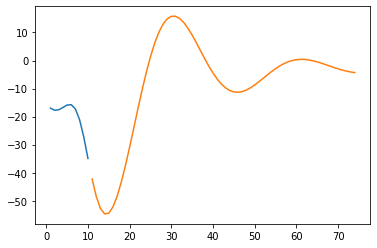

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[19190:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df_test = pd.read_csv('test_1.csv')

In [ ]:
df_other = pd.read_csv('test_2.csv')

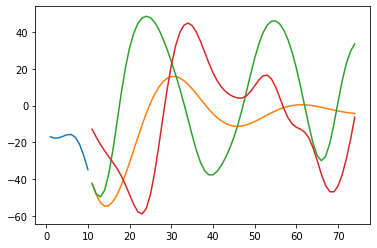

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[19190:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.plot(day_pred,df_test['ppg'])
plt.plot(day_pred,df_other['ppg'])

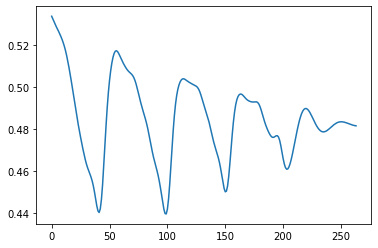

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[19000:])

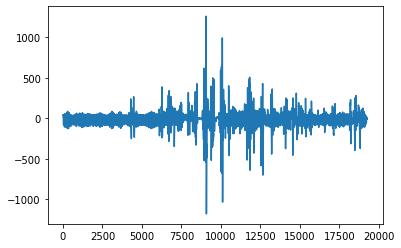

In [ ]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

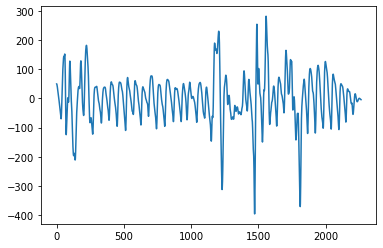

In [ ]:
plt.plot(df3[17000:])